### Computational Guided Inquiry for PChem (Neshyba, 2023)

# Phase Equilibria

## Introduction

Here we're concerned with equilibria between different phases, especially as indicated in a temperature-pressure space known as a *phase diagram*. An example is shown in Fig. 1.

<p style='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/phase diagram.png" height="300" width="300"/>  
<strong>Figure 1</strong>. A generic phase diagram. 
</p>

Lines in these diagrams -- called *phase boundaries* -- mark conditions at which two phases are in equilibrium. In general, phase boundaries are obtained from measurements. However, we can make approximations to them using two equations, one called the #Thomson Equation*, and another called the *Clausius-Clapeyron Equation*. We'll tackle those next.

## The Thomson Equation
The *Thomson equation* allows us to draw the phase boundary between two condensed phases of a substance. If the condensed phases are liquid and solid (the usual situation), we would write
 
$$
P = P_3 + {\Delta H_{fus} \over \Delta V_{fus}} ln \big ( {T \over T_3} \big ) \ \ \ (1)
$$

Here, $T_3$ and $P_3$ refer to the *triple-point* of the substance -- the combination of temperature and pressure at which solid, liquid, and vapor can be simultaneously in equilibrium. We should emphasize that this is actually just a convenient reference point for Eq. (1): any point on the solid/liquid phase boundary would do! But it happens that the triple point is usually known to high accuracy, so it's convenient for us to use it here. 

To use the Thomson Equation, we also need to know $\Delta H_{fus}$ and $\Delta V_{fus}$, both of which are approximated as constants. We'll talk a bit more about that below.

## The Clausius-Clapeyron Equation
The *Clausius-Clapeyron equation* is relevant when one of the phases we're talking about is the substance's vapor phase, and the other is a condensed phase. If the condensed phase is a *liquid*, we would write

$$
P = P_3 \times exp \big (  -{\Delta H_{vap} \over nR} \times ({1 \over T} - {1 \over T_3}) \big ) \ \ \ (2)
$$

If the condensed phase is a *solid*, we still use Eq. (2), but in place of $\Delta H_{vap}$ we substitute $\Delta H_{sub}$. 

## Drawing phase boundaries for water
For the purposes of drawing a phase diagram, the Thomson and Clausius-Clapeyron equations as laid out above are pretty good, but there are some practical points we should emphasize. 

- For *liquid/vapor* equilibria, the relevant range of temperatures is between the triple point up to the critical temperature. The lower limit is the triple-point temperature; below that temperature, one would be dealing with *supercooling*, which is a non-equilibrium phenomenon. The upper limit is the critical temperature, above which the substance becaomes *supercritical*. To generate realistic-looking liquid/vapor curves, we have to look up these  temperatures.
- For *solid/vapor* equilibria, the *upper* limit of temperatures is the triple point temperature; above that temperature we'd dealing with *superheating*, another non-equilibrium phenomenon. The lower temperature limit is usually taken to be 5-10 degrees below the triple point temperature, but this is more or less arbitrary.
- For *solid/liquid equilibria*, most substances have a *forward-sloping* curve, which means the relevant range of temperatures lies *above* the triple point temperature. However, water is different: in that case, the relevant range of temperatures lies *below* the triple-point temperature.
- Sometimes, people like to look at the temperature scale of a phase diagram in a log space. We can do that in Python pretty easily, by substituting "plt.semilogy" for "plt.plot".

## Learning goals
1. I can use the Thomson and Clausius-Clapeyron equations to draw realistic-looking phase diagrams.
1. I can explain why the triple point temperature figures into these formulas.
1. I have a sense of the physical constraints governing the temperature ranges in such curves. 
1. I can generate semi-log plots in Python.

In [1]:
# Import resources 
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import sys; sys.path.append('/home'); import PchemLibrary as PL

In [2]:
%matplotlib notebook

In [3]:
# Gas constant in SI units
R = AssignQuantity(8.314,'J/mol/K'); print(R)

# Triple point of water
T3 = AssignQuantity(273.16,'K'); print(T3)
P3 = AssignQuantity(612,'Pa'); print(P3)

# Molar mass of water
M = AssignQuantity(18,'g/mol')

8.314 joule / kelvin / mole
273.16 kelvin
612 pascal


### Defining the Thomson Equation
The cell below defines a function that, when given a temperature range, the triple point, and the changes in enthalpy and volume that result from melting a substance, produces arrays of temperature and pressure along a liquid/solid phase boundary.

In [4]:
def Thomson(T,T3,P3,DH,DV):
    T_array = np.linspace(T3,T)
    DH_over_DV = DH/DV
    DH_over_DV.ito('pascal')
    P_array = P3 + DH_over_DV*np.log(T_array/T3)
    return T_array, P_array

### Using the Thomson Equation
Below, the goal is to use the Thomson Equation to draw the phase boundary between liquid water and ice. There are a few places you'll need to fill in to complete it. The value of $\Delta H_{fus}$ is supplied for you (and assumed to be a constant). As for $\Delta V_{fus}$, for the present purposes all we need to know is that a mole of ice takes up about 10% more volume than a mole of liquid water.

Molar volume of liquid: 18 centimeter ** 3 / mole
Molar volume of solid in SI units: 19.8 centimeter ** 3 / mole
Molar volume difference: -1.8000000000000007 centimeter ** 3 / mole


<IPython.core.display.Javascript object>


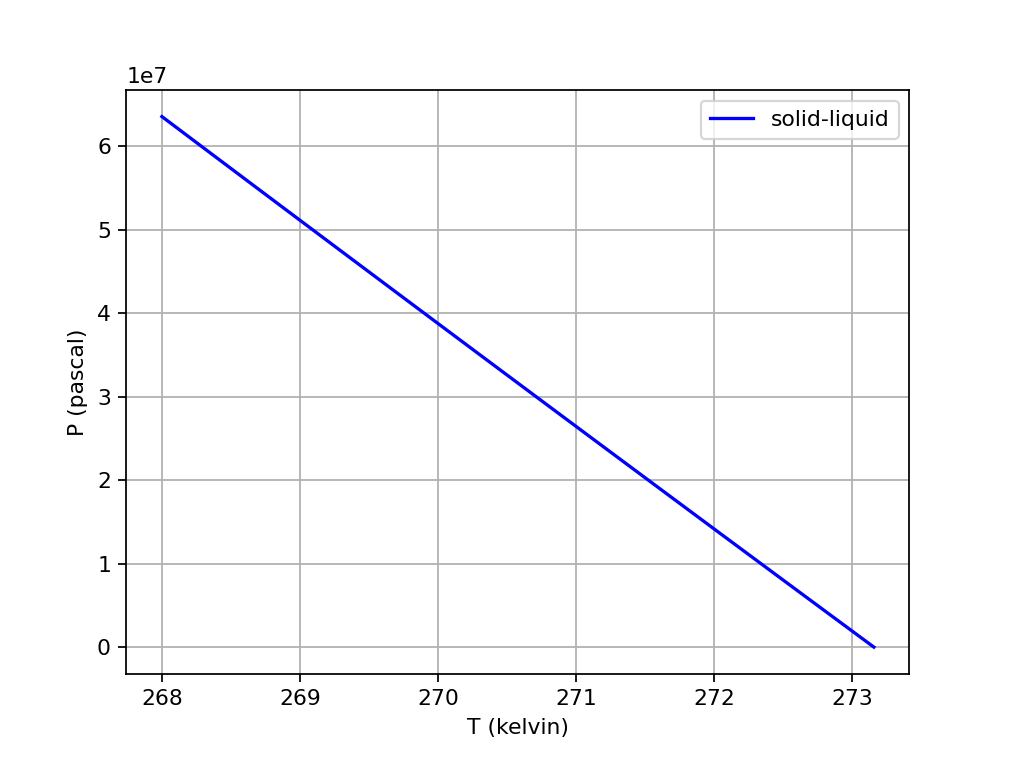

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [5]:
# Specify the temperature we want to integrate to, in units K
T = AssignQuantity(268,'K')

# Specify the enthalpy of fusion (assume the standard value at 298 K, 6 kJ/mol)
DHfus = AssignQuantity(6,'kJ/mol')

# Specify the volume of liquid water, 1 cm^3/g
V_liq_pergram = AssignQuantity(1,'cm^3/g') # 1 gram water has a volume of 1 cm^3

# Convert V_liq_pergram to cm^3/mol by multiplying by the molar mass of water; call the result V_liq
### BEGIN SOLUTION
V_liq = V_liq_pergram*M; print('Molar volume of liquid:', V_liq)
### END SOLUTION

# Estimate the volume of ice as 10% more than that of liquid
V_sol = V_liq*1.1; print('Molar volume of solid in SI units:', V_sol)

# Get the change in volume liq-sol; call the result DVfus
### BEGIN SOLUTION
DVfus = V_liq-V_sol; print('Molar volume difference:', DVfus)
### END SOLUTION

# Call Thomson
### BEGIN SOLUTION
T_sl, P_sl = Thomson(T,T3,P3,DHfus,DVfus)
### END SOLUTION

# Plot the resulting phase boundary (pressure on the y-axis, temperature on the x-axis)
### BEGIN SOLUTION
plt.figure()
plt.plot(T_sl,P_sl,color='blue',label='solid-liquid')
plt.grid(True)
plt.xlabel('T ('+str(T_sl.units)+')')
plt.ylabel('P ('+str(P_sl.units)+')')
plt.legend()
### END SOLUTION

### Defining the Clausius-Clapeyron function
In the cell below, your task is to compute arrays of temperatures and pressures along a liquid-vapor or solid-vapor phase boundary using Eq. 2. Some notes:

- The returned array of temperatures should range from T3 to T; you should use np.linspace for this purpose.
- Because it's the *ratio* of $\Delta H$ to $R$ that matters here, that's what we're passing into the function.

In [6]:
def Clausius_Clapeyron(T,T3,P3,DH_over_R):
    
### BEGIN SOLUTION
    T_array = np.linspace(T3,T)
    DH_over_R.ito('K')
    P_array = P3*np.exp(-DH_over_R*(1/T_array-1/T3))
    print('Units of resulting temperature:', T_array.units)
    print('Units of resulting pressure:', P_array.units)
### END SOLUTION

    return T_array, P_array

### Using the Clausius-Clapeyron Equation, Part 1
Below, we use the Clausius-Clapeyron Equation for the liquid-vapor phase boundary.

Units of resulting temperature: kelvin
Units of resulting pressure: pascal


<IPython.core.display.Javascript object>


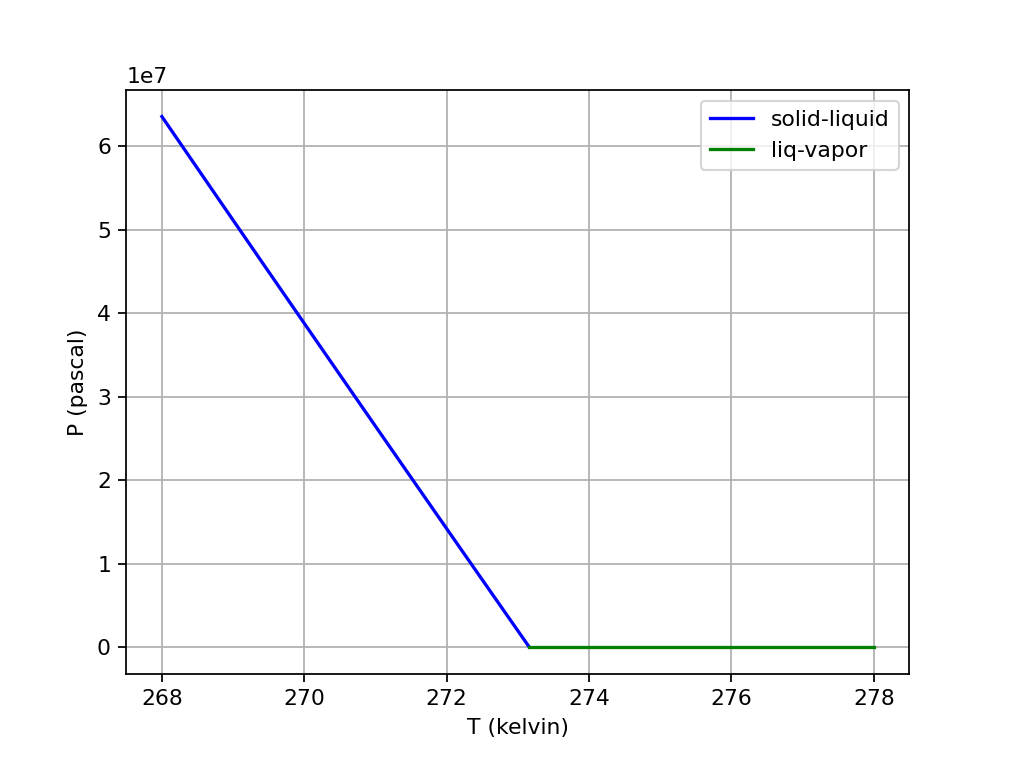

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [7]:
# Specify the temperature we want to integrate to
T = AssignQuantity(278,'K')

# Get the enthalpy of vaporization (liq->vapor) (we'll just assume the standard value at 298 K)
DHvap = AssignQuantity(44,'kJ/mol')

# Call Clausius_Clapeyron
T_lv, P_lv = Clausius_Clapeyron(T,T3,P3,DHvap/R)

# Plot the liquid->vapor phase boundary along with the solid->liquid one
plt.figure()
plt.plot(T_sl,P_sl,color='blue',label='solid-liquid')
plt.plot(T_lv,P_lv,color='green',label='liq-vapor')
plt.grid(True)
plt.xlabel('T ('+str(T_lv.units)+')')
plt.ylabel('P ('+str(P_lv.units)+')')
plt.legend()

### Using the Clausius-Clapeyron Equation, Part 2
Below, your task is to use the Clausius-Clapeyron Equation for the solid-vapor phase boundary, from the triple-point temperature down to, say, five degrees lower than that (i.e., ~268 K). 

Units of resulting temperature: kelvin
Units of resulting pressure: pascal


<IPython.core.display.Javascript object>


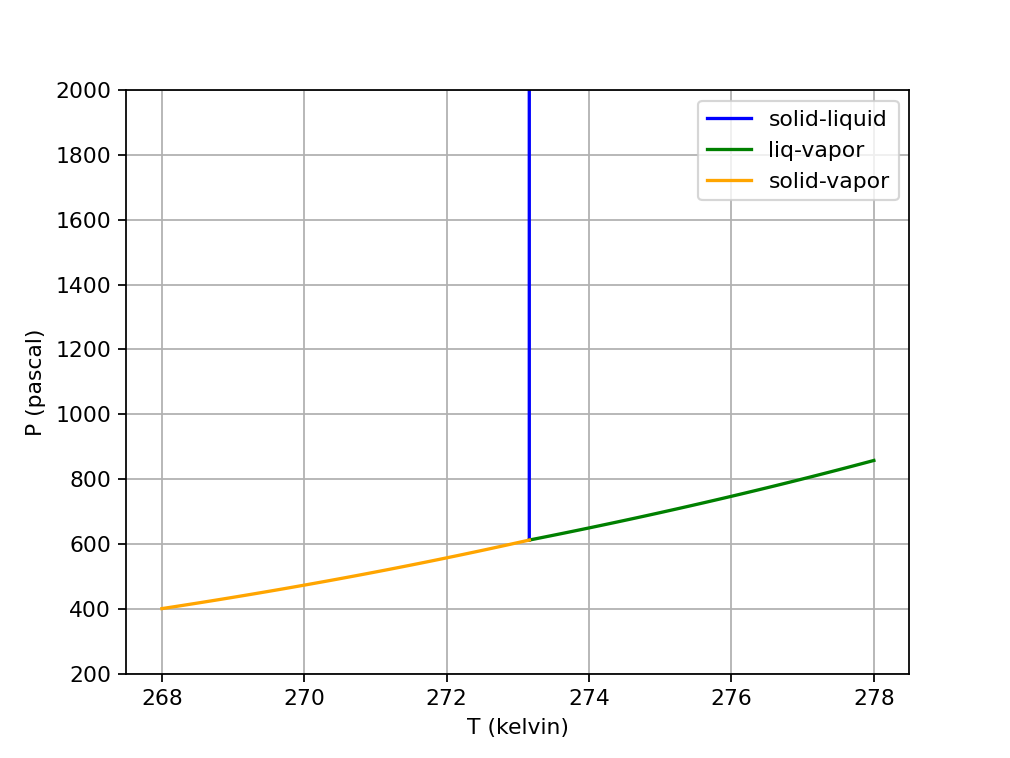

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


(200.0, 2000.0)

In [8]:
### BEGIN SOLUTION

# Specify the temperature we want to integrate to
T = AssignQuantity(268,'K')

# Get the enthalpy of sublimation (we'll just assume the standard value at 298 K)
DHsub = AssignQuantity(50,'kJ/mol')

# Call Clausius_Clapeyron
T_sv, P_sv = Clausius_Clapeyron(T,T3,P3,DHsub/R)

# Plot the solid-vapor phase boundary along with the liquid-vapor phase boundary
plt.figure()
plt.plot(T_sl,P_sl,color='blue',label='solid-liquid')
plt.plot(T_lv,P_lv,color='green',label='liq-vapor')
plt.plot(T_sv,P_sv,color='orange',label='solid-vapor')
plt.grid(True)
plt.xlabel('T ('+str(T_sv.units)+')')
plt.ylabel('P ('+str(P_sv.units)+')')
plt.legend()

### END SOLUTION

# This rescales the vertical axis so we can see more of the liquid->vapor and solid->vapor curves
plt.ylim(200,2000)

### Re-plotting on a semilog (in pressure) scale
Copy the plotting commands in your previous cell, but replace every instance of "plt.plot" with "plt.semilogy".

<IPython.core.display.Javascript object>


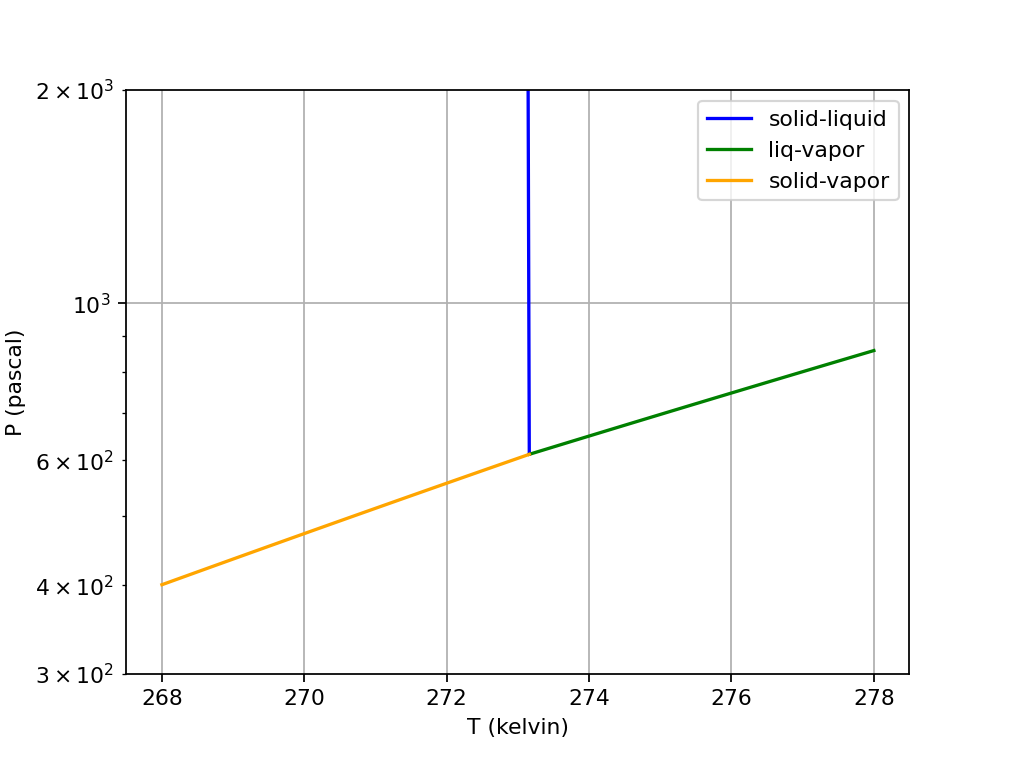

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


(300, 2000)

In [9]:
### BEGIN SOLUTION

# Plot the solid-vapor phase boundary along with the liquid-vapor phase boundary
plt.figure()
plt.semilogy(T_sl,P_sl,color='blue',label='solid-liquid')
plt.semilogy(T_lv,P_lv,color='green',label='liq-vapor')
plt.semilogy(T_sv,P_sv,color='orange',label='solid-vapor')
plt.grid(True)
plt.xlabel('T ('+str(T_sv.units)+')')
plt.ylabel('P ('+str(P_sv.units)+')')
plt.legend()

### END SOLUTION

# This rescales the vertical axis so we can see more of the liquid->vapor and solid->vapor curves
plt.ylim(300,2000)

### Refresh/save/validate/close/submit/logout